In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
X = dataset.iloc[:,3:-1]

In [4]:
X = X.drop('Geography', axis=1)

In [5]:
encoder = LabelEncoder()

In [6]:
X['Gender'] = encoder.fit_transform(X['Gender'])

In [7]:
geog = dataset['Geography']

In [8]:
geog = encoder.fit_transform(geog)

In [9]:
onehot = OneHotEncoder()

In [10]:
geog = onehot.fit_transform(geog.reshape(-1,1)).toarray()

In [11]:
X = X.values

In [12]:
X = np.c_[X,geog]

In [13]:
y = dataset['Exited'].values

In [14]:
sc = StandardScaler()

In [15]:
X = sc.fit_transform(X)

In [18]:
X.shape

(10000, 12)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [25]:
classifier = Sequential()

In [26]:
classifier.add(Dense(units = 10, input_shape = [x_train.shape[1]]))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train, epochs = 10)

Epoch 1/10
7500/7500 [==============================] - 1s 86us/step - loss: 0.5602 - accuracy: 0.7256
Epoch 2/10
7500/7500 [==============================] - 0s 59us/step - loss: 0.4500 - accuracy: 0.8056
Epoch 3/10
7500/7500 [==============================] - 0s 58us/step - loss: 0.4250 - accuracy: 0.8159
Epoch 4/10
7500/7500 [==============================] - 0s 60us/step - loss: 0.4091 - accuracy: 0.8244
Epoch 5/10
7500/7500 [==============================] - 0s 59us/step - loss: 0.3913 - accuracy: 0.8369
Epoch 6/10
7500/7500 [==============================] - 0s 60us/step - loss: 0.3728 - accuracy: 0.8469
Epoch 7/10
7500/7500 [==============================] - 0s 58us/step - loss: 0.3594 - accuracy: 0.8545
Epoch 8/10
7500/7500 [==============================] - 0s 62us/step - loss: 0.3517 - accuracy: 0.8583
Epoch 9/10
7500/7500 [==============================] - 0s 61us/step - loss: 0.3475 - accuracy: 0.8608
Epoch 10/10
7500/7500 [==============================] - 1s 69us/step - l

In [28]:
import matplotlib.pyplot as plt

In [29]:
classifier.history

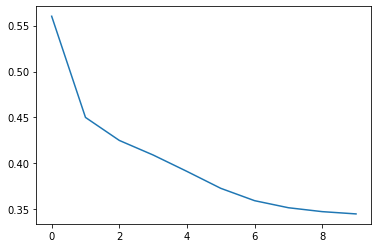

In [31]:
x = [i for i in range(10)]
plt.plot(x, classifier.history.history['loss'])

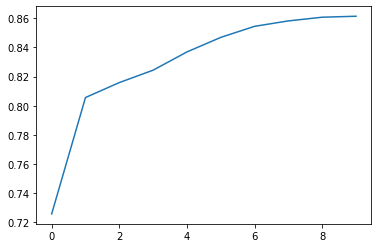

In [32]:
x = [i for i in range(10)]
plt.plot(x, classifier.history.history['accuracy'])

In [33]:
from sklearn.metrics import classification_report

In [34]:
y_pred = classifier.predict(x_test)

In [36]:
y_pred = y_pred > 0.5
y_pred = y_pred.astype(int)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1999
           1       0.74      0.44      0.55       501

    accuracy                           0.86      2500
   macro avg       0.80      0.70      0.73      2500
weighted avg       0.85      0.86      0.84      2500

